In [1]:
import numpy as np
from scipy import stats
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

import core
import wocca
import visualize as vis

from ds2_trt import *

In [139]:
import importlib
importlib.reload(vis)

<module 'visualize' from '/data/liyichao/code/microstates/wocca_project_code/visualize.py'>

In [2]:
pickle_prefix = "../wocca_project_pickles/ds2_trt_"
bounds_fn = pickle_prefix + "bounds.pickle"
wocca_fn = pickle_prefix + "wocca.pickle"
wocca_full_fn = pickle_prefix + "wocca_full.pickle"
affinity_fn = pickle_prefix + "affinity.pickle"
affinity_full_fn = pickle_prefix + "affinity_full.pickle"
sess_wocca_fn = pickle_prefix + "sess_wocca.pickle"

ds1_foundation_fn = "../wocca_project_pickles/ds1_leipzig_foundation.pickle"
ds2_foundation_fn = pickle_prefix + "foundation.pickle"

### Load foundation data

In [3]:
with open(ds1_foundation_fn, mode = "rb") as FIn:
    ds1_info, ds1_ws, ds1_scores, ds1_total_energy_core, ds1_foundation_version = pickle.load(FIn)
with open(ds2_foundation_fn, mode = "rb") as FIn:
    ds2_info, ds2_ws, ds2_scores, ds2_total_energy_core, ds2_foundation_version = pickle.load(FIn)

In [37]:
# %% Visualization functions

fig_path = "../wocca_project_figs/explore_wocca_consistency/"
fig_supp_path = "../wocca_project_figs/supplementary/"

default_color = "#607280"
highlight_color = "#78AAD3"
hist_within_color = "#49ADFF"

### Check consistency between datasets

In [5]:
import ds3_sedation as ds3
import ds1_leipzig as ds1

with open("../wocca_project_pickles/ds3_sedation_wocca.pickle", mode = "rb") as FIn:
    ds3_ws = pickle.load(FIn)[1]
ds3_info = ds3.info.copy()

/home/liyichao/miniconda3/envs/mne/lib/python3.11/site-packages/pymatreader/utils.py:124: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Extracting parameters from /data/liyichao/code/microstates/wocca_project_code/../data/sedation/02-2010-anest 20100210 135.003.set...


/data/liyichao/code/microstates/wocca_project_code/ds1_sedation.py:27: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  raw = mne.io.read_epochs_eeglab(path + full_fn[0] + ".set")
/data/liyichao/code/microstates/wocca_project_code/ds1_sedation.py:27: RuntimeWarning: Unknown types found, setting as type EEG:
ref: ['Cz']
  raw = mne.io.read_epochs_eeglab(path + full_fn[0] + ".set")
/data/liyichao/code/microstates/wocca_project_code/ds1_sedation.py:27: RuntimeWarning: Estimated head radius (0.9 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_epochs_eeglab(path + full_fn[0] + ".set")


Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated
Ready.
Reading /data/liyichao/code/microstates/wocca_project_code/../data/MPI_Leipzig_MBB/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...


/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:39: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_ref = mne.io.read_raw_eeglab(path + full_fn[0] + ".set").load_data()
/data/liyichao/code/microstates/wocca_project_code/ds2_leipzig.py:39: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_ref = mne.io.read_raw_eeglab(path + full_fn[0] + ".set").load_data()


In [13]:
# Calculate Leipzig and TRT consistency
ds2_ws_trans = np.zeros([10, ds1_ws.shape[1]], dtype = complex)
for i in range(10):
    ds2_ws_trans[i] = wocca.purify(vis.phasemap_montage_transfer(ds2_ws[i], ds2_info, ds1_info))
ds1_ws_trans = np.zeros([10, ds2_ws.shape[1]], dtype = complex)
for i in range(10):
    ds1_ws_trans[i] = wocca.purify(vis.phasemap_montage_transfer(ds1_ws[i], ds1_info, ds2_info))

res_w = np.zeros([10, 10])
res_aff = np.zeros([10, 10])
for i in range(10):
    for j in range(10):
        res_w[i, j] = (np.abs(wocca.w(ds1_ws_trans[i], ds2_ws[j])) + np.abs(wocca.w(ds1_ws[i], ds2_ws_trans[j]))) / 2
        res_aff[i, j] = (core.topomap_affinity(ds1_ws_trans[i], ds2_ws[j], True, False) + core.topomap_affinity(ds1_ws[i], ds2_ws_trans[j], True, False)) / 2

Creating RawArray with float64 data, n_channels=61, n_times=300
    Range : 0 ... 299 =      0.000 ...     0.598 secs
Ready.
Creating RawArray with float64 data, n_channels=122, n_times=300
    Range : 0 ... 299 =      0.000 ...     0.598 secs
Ready.
Interpolating bad channels
    Automatic origin fit: head of radius 89.6 mm
Computing interpolation matrix from 61 sensor positions
Interpolating 61 sensors
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Creating RawArray with float64 data, n_channels=61, n_times=300
    Range : 0 ... 299 =      0.000 ...     0.598 secs
Ready.
Creating RawArray with float64 data, n_channels=122, n_times=300
    Range : 0 ... 299 =      0.000 ...     0.598 secs
Ready.
Interpolating bad channels
    Automatic origin fit: head of radius 89.6 mm
Computing interpolation matrix from 61 sensor positions
Interpolating 61 sensors
EEG channel type selected for re-referencing
Applying average reference.


/data/liyichao/code/microstates/wocca_project_code/visualize.py:145: RuntimeWarning: (X, Y) fit (-0.6, 20.0) more than 20 mm from head frame origin
  raw_t.interpolate_bads()
/data/liyichao/code/microstates/wocca_project_code/visualize.py:145: RuntimeWarning: (X, Y) fit (-0.6, 20.0) more than 20 mm from head frame origin
  raw_t.interpolate_bads()
/data/liyichao/code/microstates/wocca_project_code/visualize.py:145: RuntimeWarning: (X, Y) fit (-0.6, 20.0) more than 20 mm from head frame origin
  raw_t.interpolate_bads()
/data/liyichao/code/microstates/wocca_project_code/visualize.py:145: RuntimeWarning: (X, Y) fit (-0.6, 20.0) more than 20 mm from head frame origin
  raw_t.interpolate_bads()


Interpolating 61 sensors
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Creating RawArray with float64 data, n_channels=61, n_times=300
    Range : 0 ... 299 =      0.000 ...     1.196 secs
Ready.
Creating RawArray with float64 data, n_channels=122, n_times=300
    Range : 0 ... 299 =      0.000 ...     1.196 secs
Ready.
Interpolating bad channels
    Automatic origin fit: head of radius 86.5 mm
Computing interpolation matrix from 61 sensor positions
Interpolating 61 sensors
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Creating RawArray with float64 data, n_channels=61, n_times=300
    Range : 0 ... 299 =      0.000 ...     1.196 secs
Ready.
Creating RawArray with float64 data, n_channels=122, n_times=300
    Range : 0 ... 299 =      0.000 ...     1.196 secs
Ready.
Interpolating bad channels
    Automatic origin fit: head of radius 86.5 mm
Computing interpol

/data/liyichao/code/microstates/wocca_project_code/visualize.py:145: RuntimeWarning: (X, Y) fit (-0.6, 20.0) more than 20 mm from head frame origin
  raw_t.interpolate_bads()
/data/liyichao/code/microstates/wocca_project_code/visualize.py:145: RuntimeWarning: (X, Y) fit (-0.6, 20.0) more than 20 mm from head frame origin
  raw_t.interpolate_bads()
/data/liyichao/code/microstates/wocca_project_code/visualize.py:145: RuntimeWarning: (X, Y) fit (-0.6, 20.0) more than 20 mm from head frame origin
  raw_t.interpolate_bads()
/data/liyichao/code/microstates/wocca_project_code/visualize.py:145: RuntimeWarning: (X, Y) fit (-0.6, 20.0) more than 20 mm from head frame origin
  raw_t.interpolate_bads()


Interpolating 61 sensors
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Creating RawArray with float64 data, n_channels=61, n_times=300
    Range : 0 ... 299 =      0.000 ...     1.196 secs
Ready.
Creating RawArray with float64 data, n_channels=122, n_times=300
    Range : 0 ... 299 =      0.000 ...     1.196 secs
Ready.
Interpolating bad channels
    Automatic origin fit: head of radius 86.5 mm
Computing interpolation matrix from 61 sensor positions
Interpolating 61 sensors
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Creating RawArray with float64 data, n_channels=61, n_times=300
    Range : 0 ... 299 =      0.000 ...     1.196 secs
Ready.
Creating RawArray with float64 data, n_channels=122, n_times=300
    Range : 0 ... 299 =      0.000 ...     1.196 secs
Ready.
Interpolating bad channels
    Automatic origin fit: head of radius 86.5 mm
Computing interpol

/data/liyichao/code/microstates/wocca_project_code/visualize.py:145: RuntimeWarning: (X, Y) fit (-0.6, 20.0) more than 20 mm from head frame origin
  raw_t.interpolate_bads()
/data/liyichao/code/microstates/wocca_project_code/visualize.py:145: RuntimeWarning: (X, Y) fit (-0.6, 20.0) more than 20 mm from head frame origin
  raw_t.interpolate_bads()


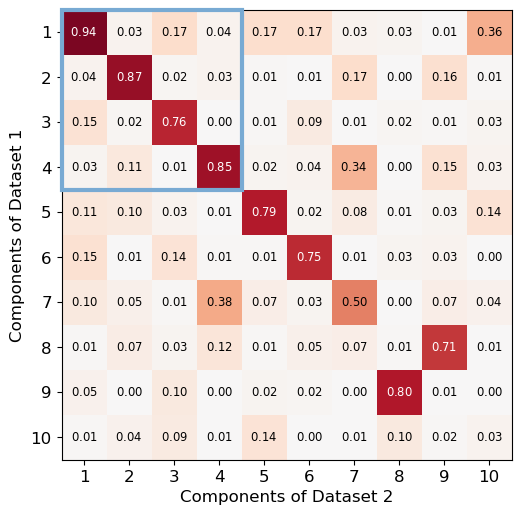

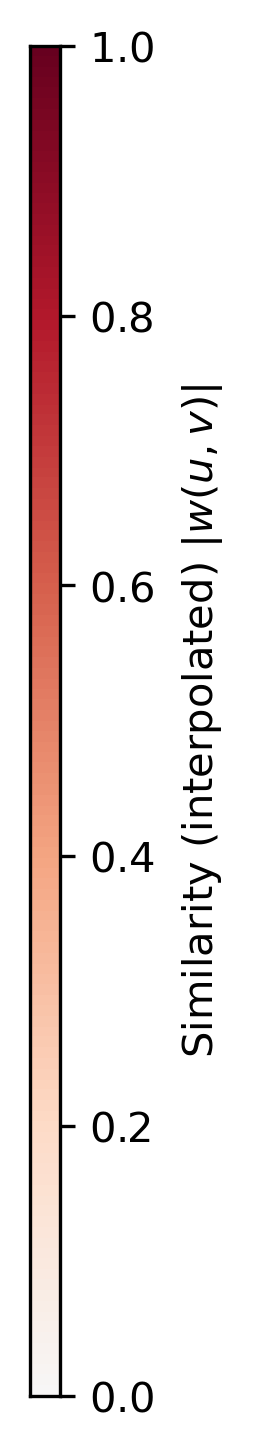

In [14]:
# Draw Leipzig and TRT consistency
fx, fy = 5.3, 5.1
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.7 / fx, 0.5 / fy, 4.5 / fx, 4.5 / fy])
plt.imshow(np.abs(res_w), vmin = -1, vmax = 1, cmap = "RdBu_r")
for i in range(10):
    for j in range(10):
        plt.text(j, i, "${:.2f}$".format(res_w[i, j]), ha = "center", va = "center", size = "small", \
                 c = "#000000" if vis.luminance(mpl.colormaps.get_cmap("RdBu_r")((res_w[i, j] + 1) / 2)) > 0.5 else "#FFFFFF")
rect = mpl.patches.Rectangle([-0.5, -0.5], 4, 4, ec = highlight_color, fc = "#00000000", lw = 3, zorder = 10, clip_on = False)
ax.add_patch(rect)
plt.ylabel("Components of Dataset 1", size = "large")
plt.xlabel("Components of Dataset 2", size = "large")
ax.set_yticks(np.arange(10))
ax.set_yticklabels([str(i + 1) for i in range(10)])
ax.set_xticks(np.arange(10))
ax.set_xticklabels([str(i + 1) for i in range(10)])
ax.tick_params(labelsize = "large")
fig.savefig(fig_path + "leipzig_trt_similarity.svg", format = "svg")

# Colorbar
fig = vis.colorbar("RdBu_r", fs = [0.75, 4.7], bs = [0.1, 4.5], ticks = np.linspace(0, 1, 6, True), clip = [0, 1], vmin = -1, vmax = 1, \
                   tick_labels = ["${:.1f}$".format(i) for i in np.linspace(0, 1, 6, True)], caption = "Similarity (interpolated) $|w(u,v)|$")
fig.savefig(fig_path + "leipzig_trt_similarity_colorbar.svg", format = "svg")

### Check consistency across sessions and subjects

In [6]:
# %% Load boundaries and ids

with open(bounds_fn, mode = "rb") as FIn:
    ids, bounds = pickle.load(FIn)

In [345]:
# %% WOCCA of each individual session
# NOTICE: MAY TAKE SEVERAL HOURS

n_comps = 10
n_comps_ext = 15
n_dim_pca = 30

# Process each session
ws_sess = np.zeros([n_subjs, n_sess, n_comps, len(info.ch_names)], dtype = complex)
te_sess = np.zeros([n_subjs, n_sess])
sc_sess = np.zeros([n_subjs, n_sess, n_comps])

for i in range(n_subjs):
    for j in range(n_sess):
        v = []
        for k in range(2):
            tmp = iter_twms(i, j, k)
            v.append(tmp.data.copy())
        v = np.concatenate(v)

        u, pca_basis = wocca.pca_decomp(v, n_dim_pca)
        ws_pca = wocca.wocca(u, n_components = n_comps_ext, use_torch = True, backtrack = True)
        ws_sess[i, j] = wocca.pca_recover(ws_pca[ : n_comps], pca_basis)
        
        te_sess[i, j] = wocca.total_energy(v)
        sc_sess[i, j] = wocca.score(v, ws_sess[i, j])

# Save session WOCCA data as pickle
with open(sess_wocca_fn, mode = "wb") as FOut:
    pickle.dump((ws_sess, te_sess, sc_sess), FOut)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using GPU: True
Iter 1 / 15
No. of iters 24
Score 1775.1645349340558 

Iter 2 / 15
No. of iters 23
Score 1250.4710267103248 

Iter 3 / 15
No. of iters 3

/home/liyichao/miniconda3/envs/mne/lib/python3.11/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Iter 3 / 15
No. of iters 28
Score 528.6592411996776 

Iter 4 / 15
No. of iters 48
Score 473.1307050137638 

Iter 5 / 15
No. of iters 41
Score 377.492569200628 

Iter 6 / 15
No. of iters 35
Score 184.34053471047378 

Iter 7 / 15
No. of iters 204
Score 167.2551714829354 

Iter 8 / 15
No. of iters 333
Score 153.48618293375498 

Iter 9 / 15
No. of iters 35
Score 146.45030912231195 

Iter 10 / 15
No. of iters 41
Score 145.2515823331702 

Iter 11 / 15
No. of iters 112
Score 126.5248273652222 

Iter 12 / 15
No. of iters 50
Score 116.36887746764626 

Iter 13 / 15
No. of iters 45
Score 103.43675771045675 

Iter 14 / 15
No. of iters 122
Score 91.0899983652408 

Iter 15 / 15
No. of iters 194
Score 79.9297515124999 

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00,

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [7]:
# %% Reload session WOCCA data

with open(sess_wocca_fn, mode = "rb") as FIn:
    ws_sess, te_sess, sc_sess = pickle.load(FIn)
n_comps = sc_sess.shape[-1]

In [8]:
# %% Determine indices of matched phasemaps

n_match = 6

matches = np.zeros([n_subjs, n_sess, n_match], dtype = int)
match_scores = np.zeros([n_subjs, n_sess])
for i in range(n_subjs):
    for j in range(n_sess):
        tmp_match = np.zeros([n_match], dtype = int)
        for k in range(n_match):
            tmp_w = np.zeros([n_comps])
            for l in range(n_comps):
                tmp_w[l] = np.abs(wocca.w(ds2_ws[k], ws_sess[i, j, l]))
            tmp_match[k] = np.argmax(tmp_w)
            match_scores[i, j] += tmp_w[tmp_match[k]]
        matches[i, j] = tmp_match

In [9]:
# %% Calculate similarity matrices

sm = np.zeros([n_match, n_subjs * n_sess, n_subjs * n_sess])
for i in range(n_match):
    for j1 in range(n_subjs):
        for j2 in range(n_sess):
            j = j1 * n_sess + j2
            for k1 in range(n_subjs):
                for k2 in range(n_sess):
                    k = k1 * n_sess + k2
                    sm[i, j, k] = np.abs(wocca.w(ws_sess[j1, j2, matches[j1, j2, i]], ws_sess[k1, k2, matches[k1, k2, i]]))

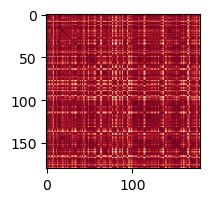

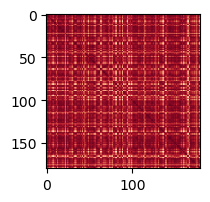

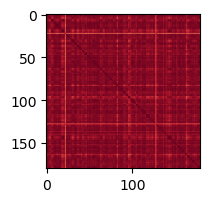

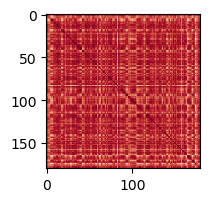

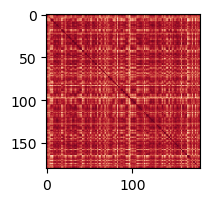

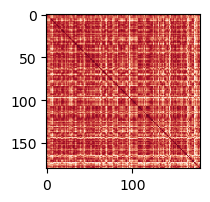

In [10]:
for i in range(n_match):
    plt.figure(figsize = [2, 2])
    plt.imshow(sm[i], vmin = -1, vmax = 1, cmap = "RdBu_r")

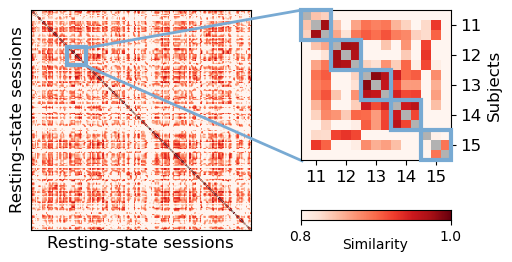

In [20]:
k0, k1 = 30, 45
vmin = 0.8
diag_mask = np.zeros([n_subjs * n_sess] * 2 + [4])
for i in range(n_subjs * n_sess):
    diag_mask[i, i] = [0.7, 0.7, 0.7, 1]

fx, fy = 5.2, 2.6
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.3 / fx, 0.3 / fy, 2.2 / fx, 2.2 / fy])
plt.imshow(sm[ : 4].mean(axis = 0), vmin = vmin, vmax = 1, cmap = "Reds")
plt.imshow(diag_mask)
ax.set_yticks([])
ax.set_xticks([])
plt.ylabel("Resting-state sessions", size = "large")
plt.xlabel("Resting-state sessions", size = "large")
rect = mpl.patches.Rectangle([k0 - 0.5] * 2, k1 - k0, k1 - k0, lw = 3, ec = highlight_color, fc = "#00000000", zorder = 10)
ax.add_patch(rect)
plt.axis(plt.axis())
x_link = (3 - 0.3) / 2.2 * (n_subjs * n_sess + 1) - 0.5
y_link = 1.5 / 2.2 * (n_subjs * n_sess + 1) - 0.5
plt.plot([k1 + 0.5, x_link], [k0 + 0.5, -0.5], lw = 2, c = highlight_color, zorder = 10, clip_on = False)
plt.plot([k1 + 0.5, x_link], [k1 + 0.5, y_link], lw = 2, c = highlight_color, zorder = 10, clip_on = False)

ax = plt.axes([3 / fx, 1 / fy, 1.5 / fx, 1.5 / fy])
plt.imshow(sm[ : 4, k0 : k1, k0 : k1].mean(axis = 0), vmin = vmin, vmax = 1, cmap = "Reds")
plt.imshow(diag_mask[k0 : k1, k0 : k1])
for k in range(k0, k1, n_sess):
    rect = mpl.patches.Rectangle([k - k0 - 0.5] * 2, n_sess, n_sess, lw = 3, ec = highlight_color, fc = "#00000000", zorder = 15, clip_on = False)
    ax.add_patch(rect)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_xticks(np.arange(1, k1 - k0, n_sess))
ax.set_xticklabels([str(i // n_sess + 1) for i in range(k0, k1, n_sess)])
ax.set_yticks(np.arange(1, k1 - k0, n_sess))
ax.set_yticklabels([str(i // n_sess + 1) for i in range(k0, k1, n_sess)])
ax.tick_params(labelsize = "large")
plt.ylabel("Subjects", size = "large")

ax = plt.axes([3 / fx, 0.4 / fy, 1.5 / fx, 0.1 / fy])
tmp_lin = np.linspace(vmin, 1, 1001, True)
plt.pcolormesh(tmp_lin, [0, 1], ((tmp_lin[1 : ] + tmp_lin[ : -1]) / 2).reshape([1, -1]), cmap = "Reds", vmin = vmin, vmax = 1)
ax.set_yticks([])
ax.set_xticks([vmin, 1])
fig.text((3 + 1.5 / 2) / fx, 0.15 / fy, "Similarity", size = "medium", ha = "center", va = "center")

fig.savefig(fig_path + "trt_subj_similarity.svg", format = "svg")

In [11]:
def extract_within_and_between(mat, classes = None):
    tmp_n = len(mat)
    if classes is None:
        classes = np.repeat(np.arange(n_subjs), n_sess)
    within = np.zeros([tmp_n * (tmp_n - 1) // 2])
    between = np.zeros_like(within)
    tmp_wn, tmp_bn = 0, 0
    for i in range(tmp_n - 1):
        for j in range(i + 1, tmp_n):
            if classes[i] == classes[j]:
                within[tmp_wn] = mat[i, j]
                tmp_wn += 1
            else:
                between[tmp_bn] = mat[i, j]
                tmp_bn += 1

    return within[ : tmp_wn], between[ : tmp_bn]

0.877437585368962 0.8082288264907563


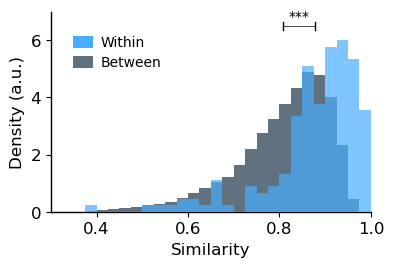

In [12]:
# %% Make within and between subjects comparison

withins, betweens = extract_within_and_between(sm[ : 4].mean(axis = 0))

fx, fy = 3.9, 2.7
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.5 / fx, 0.6 / fy, 3.2 / fx, 2 / fy])
plt.hist(betweens, bins = 28, range = [0.3, 1], density = 1 / len(betweens), color = default_color)
plt.hist(withins, bins = 28, range = [0.3, 1], density = 1 / len(withins), color = hist_within_color, alpha = 0.7)
plt.axis([0.3, 1, 0, 7])
vis.lower_left(ax)
ax.tick_params(labelsize = "large")
plt.xlabel("Similarity", size = "large")
plt.ylabel("Density (a.u.)", size = "large")

within_mean, between_mean = withins.mean(), betweens.mean()
print(within_mean, between_mean)
plt.plot([within_mean] * 2, [6.35, 6.65], lw = 1, c = "#000000")
plt.plot([between_mean] * 2, [6.35, 6.65], lw = 1, c = "#000000")
plt.plot([within_mean, between_mean], [6.5] * 2, lw = 0.5, c = "#000000")
plt.text((within_mean + between_mean) / 2, 6.6, "***", ha = "center", va = "bottom", size = "medium")

ax = plt.axes([0.7 / fx, 2 / fy, 1 / fx, 0.4 / fy])
vis.no_axes(ax)
plt.axis([0, 1, 0, 0.4])
rect = mpl.patches.Rectangle([0.02, 0.24], 0.2, 0.12, ec = "#00000000", lw = 1, fc = hist_within_color)
ax.add_patch(rect)
plt.text(0.3, 0.3, "Within", ha = "left", va = "center", size = "medium")
rect = mpl.patches.Rectangle([0.02, 0.04], 0.2, 0.12, ec = "#00000000", lw = 1, fc = default_color)
ax.add_patch(rect)
plt.text(0.3, 0.1, "Between", ha = "left", va = "center", size = "medium")

fig.savefig(fig_path + "trt_subj_similarity_hist.svg", format = "svg")

In [13]:
# %% Non-parametric test

# For each component
n_perms = 1000
random_state = np.random.RandomState(seed = 1)

rs_stats = np.zeros([n_match])
rs_stats_perms = np.zeros([n_match, n_perms])
for i in range(n_match):
    tmp_w, tmp_b = extract_within_and_between(sm[i])
    rs_stats[i] = stats.ranksums(tmp_w, tmp_b)[0]

    classes = np.repeat(np.arange(n_subjs), n_sess)
    for j in range(n_perms):
        tmp_w, tmp_b = extract_within_and_between(sm[i], random_state.permutation(classes))
        rs_stats_perms[i, j] = stats.ranksums(tmp_w, tmp_b)[0]

# Overall
n_perms = 1000
random_state = np.random.RandomState(seed = 1)

smt = sm[ : 4].mean(axis = 0)
rs_stat_perms = np.zeros([n_perms])

tmp_w, tmp_b = extract_within_and_between(smt)
rs_stat = stats.ranksums(tmp_w, tmp_b)[0]

classes = np.repeat(np.arange(n_subjs), n_sess)
for i in range(n_perms):
    tmp_w, tmp_b = extract_within_and_between(smt, random_state.permutation(classes))
    rs_stat_perms[i] = stats.ranksums(tmp_w, tmp_b)[0]

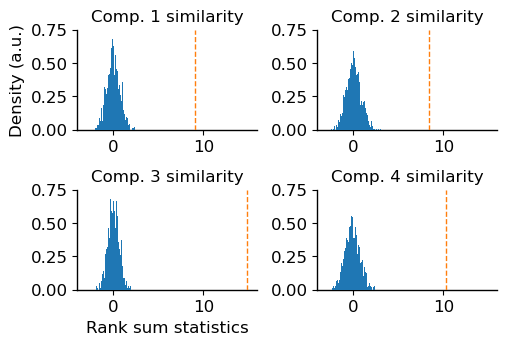

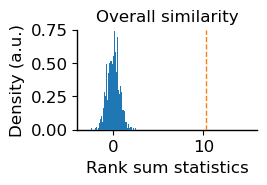

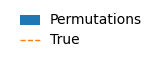

In [40]:
# %% Non-parametric test histograms

fx, fy = 5.1, 3.4
fig = plt.figure(figsize = [fx, fy])
for i in range(4):
    ix = i % 2
    iy = i // 2
    ax = plt.axes([(0.8 + 2.4 * ix) / fx, (0.5 + 1.6 * (1 - iy)) / fy, 1.8 / fx, 1 / fy])
    plt.hist(rs_stats_perms[i], density = 1 / len(rs_stats_perms[i]), bins = 50)
    plt.axvline(x = rs_stats[i], lw = 1, c = vis.colors[1], ls = "--")
    plt.axis([-4, 16, 0, 0.75])
    vis.lower_left(ax)
    ax.set_yticks(np.linspace(0, 1, 4, False))
    ax.tick_params(labelsize = "large")
    if i == 2:
        plt.xlabel("Rank sum statistics", size = "large")
    if i == 0:
        plt.ylabel("Density (a.u.)", size = "large")
    plt.title("Comp. {:} similarity".format(i + 1))
fig.savefig(fig_supp_path + "within_subj_perm_by_comps.svg", format = "svg")

fx, fy = 2.7, 1.8
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.8 / fx, 0.5 / fy, 1.8 / fx, 1 / fy])
plt.hist(rs_stat_perms, density = 1 / len(rs_stat_perms), bins = 50)
plt.axvline(x = rs_stats[i], lw = 1, c = vis.colors[1], ls = "--")
plt.axis([-4, 16, 0, 0.75])
vis.lower_left(ax)
ax.tick_params(labelsize = "large")
plt.xlabel("Rank sum statistics", size = "large")
plt.ylabel("Density (a.u.)", size = "large")
plt.title("Overall similarity".format(i + 1))
fig.savefig(fig_supp_path + "within_subj_perm_overall.svg", format = "svg")

fx, fy = 1.4, 0.4
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0, 0, 1, 1])
plt.axis([0, fx, 0, fy])
vis.no_axes(ax)
rect = mpl.patches.Rectangle([0.1, 0.25], 0.2, 0.1, lw = 0, ec = "#00000000", fc = vis.colors[0])
ax.add_patch(rect)
plt.plot([0.1, 0.3], [0.1, 0.1], lw = 1, c = vis.colors[1], ls = "--") 
plt.text(0.4, 0.3, "Permutations", ha = "left", va = "center", size = "medium")
plt.text(0.4, 0.1, "True", ha = "left", va = "center", size = "medium")
fig.savefig(fig_supp_path + "within_subj_perm_legend.svg", format = "svg")